# Supervised Learning

## Linear Regression

The simplest machine learning algorithm, linear regression models the relationship between a scalar output and one or more scalar input features. Lets take a look!

In [1]:
# Importing the libraries we'll need
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_diabetes # We'll use the diabetes dataset for this example
from sklearn.metrics import mean_squared_error, r2_score

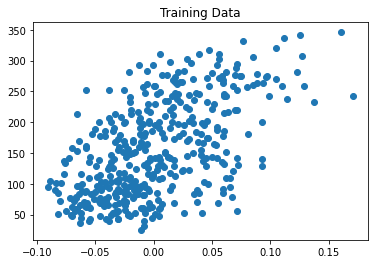

In [2]:
# Load the dataset
data = load_diabetes()

x = data.data[:, np.newaxis, 2] # use only one feature
# split the data into training and test sets
x_train = x[:-20]
x_test = x[-20:]

y = data.target
# split the targets into training and test sets
y_train = y[:-20]
y_test = y[-20:]


plt.scatter(x_train,y_train)
plt.title("Training Data")
plt.show()

In [3]:
# Train the model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
print('Learned coefficient:', model.coef_[0]) # only one coefficient with simple linear regression (1 feature)

Learned coefficient: 938.2378612512637


In [4]:
# Test the model
y_pred = model.predict(x_test)

# Print results
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 score (1 is perfect fit): {r2_score(y_test, y_pred)}')

Mean squared error: 2548.0723987259694
R2 score (1 is perfect fit): 0.47257544798227147


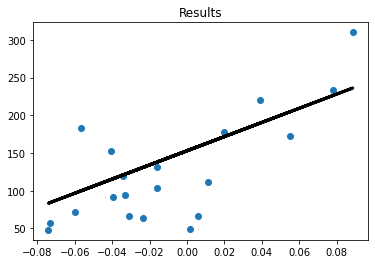

In [5]:
# Plot the model
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, "black", linewidth=3)
plt.title("Results")
plt.show()

## Perceptron

A perceptron is a computational model of a neuron. On its own, it's limited to linear classification, but they can be combined in layers to create a neural network which is far more powerful. Lets build this one from the ground up so we can take a look into what's really going on!

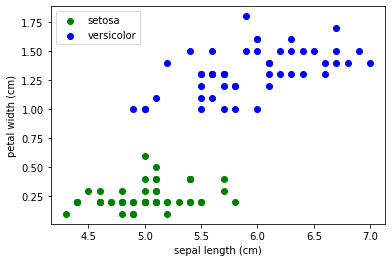

In [6]:
# Dataset
from sklearn.datasets import load_iris # one of the most well known datasets out there!
from sklearn.model_selection import train_test_split # we'll randomize the splits this time

data = load_iris()
x = data.data
y = data.target
# split data
x_train, x_test, y_train, y_test = train_test_split(x[:100], y[:100], test_size=0.2, random_state=0)

plt.scatter(x[:50, 0], x[:50, 3], color="green", label=data.target_names[0])
plt.scatter(x[50:100, 0], x[50:100, 3], color="blue", label=data.target_names[1])
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[3])
plt.legend()
plt.show()

In [7]:
def activation_function(a):
        # The simplest activation function is the step function
        # if the activation is >= 0, set the output to 1
        # if the activation is < 0, set the output to 0
        return np.where(a >= 0, 1, 0)

def predict(X, weights, bias):
    # a vectorized form of the feed forward algorithm found below
    # handles an entire matrix of inputs at once, instead of 1 at a time
    a = X @ weights + bias
    return activation_function(a)
    
# track how the model's performance as it learns
def train_perceptron(lr=0.01): # lr is the learning rate, prevents over adjusting weights
    n, m = x_train.shape # n is the number of examples, m is the number of features
    weights = np.zeros(m) # a weight to connect to each input feature
    bias = np.zeros(1) # a bias node, determines the threshold of activation
    
    train_errors = []
    train_accs = []
    test_accs = []
    epochs = 10 # number of training iterations
    for epoch in range(1,epochs+1):
        total_error = 0 # total squared error for the epoch
        for xi, yi in zip(x_train, y_train): # go over each input paired with its label
            
            # Feed-forward: calculate prediction
            a = 0 # the node's activation
            for wj, xij in zip(weights, xi): # go over each input feature paired with its weight
                a += wj * xij
            a += bias # add the bias
            
            # can also be vectorized as such:
            # a = weights @ xi.T + bias
            
            y_pred = activation_function(a) # calculate output
            
            # Backpropagation: use the error to adjust the weights
            error = y_pred - yi
            sq_error = error**2
            total_error += sq_error
            
            weights -= lr * 2 * error * xi
            bias -= lr * 2 * error
        # end of epoch
        
        train_errors.append(total_error)
        # using the current network (weights and bias), predict all the outputs and evaluate the accuracy
        acc = (predict(x_train, weights, bias) == y_train).sum() / n
        test_acc = (predict(x_test, weights, bias) == y_test).sum() / x_test.shape[0]
        train_accs.append(acc)
        test_accs.append(test_acc)
        print(f"epoch: {epoch}, error: {total_error[0]:.3f}, train accuracy: {acc:.3f}, test accuracy: {test_acc:.3f}")
    # end of training
    return weights, bias, train_errors, train_accs, test_accs

epoch: 1, error: 11.000, train accuracy: 0.988, test accuracy: 1.000
epoch: 2, error: 2.000, train accuracy: 1.000, test accuracy: 1.000
epoch: 3, error: 0.000, train accuracy: 1.000, test accuracy: 1.000
epoch: 4, error: 0.000, train accuracy: 1.000, test accuracy: 1.000
epoch: 5, error: 0.000, train accuracy: 1.000, test accuracy: 1.000
epoch: 6, error: 0.000, train accuracy: 1.000, test accuracy: 1.000
epoch: 7, error: 0.000, train accuracy: 1.000, test accuracy: 1.000
epoch: 8, error: 0.000, train accuracy: 1.000, test accuracy: 1.000
epoch: 9, error: 0.000, train accuracy: 1.000, test accuracy: 1.000
epoch: 10, error: 0.000, train accuracy: 1.000, test accuracy: 1.000


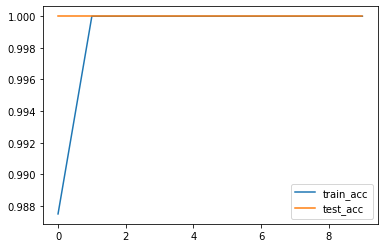

Weights: [-0.054 -0.176  0.21   0.1  ]    Bias: [-0.02]


In [8]:
weights, bias, train_errors, train_accs, test_accs = train_perceptron()

plt.plot(train_accs, label="train_acc")
plt.plot(test_accs, label="test_acc")
plt.legend()
plt.show()

print("Weights: ", end="")
print(weights, end="    ")
print("Bias: ", end="")
print(bias)

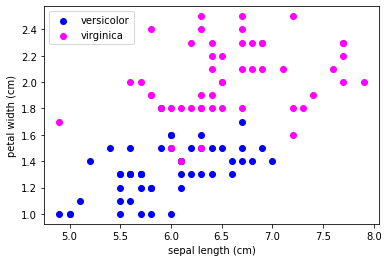

In [9]:
# Lets try with a harder split, classes 2 and 3 are a little harder to separate
x = data.data
y = data.target - 1 
# split data
x_train, x_test, y_train, y_test = train_test_split(x[50:], y[50:], test_size=0.2, random_state=0)

plt.scatter(x[50:100, 0], x[50:100, 3], color="blue", label=data.target_names[1])
plt.scatter(x[100:, 0], x[100:, 3], color="magenta", label=data.target_names[2])
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[3])
plt.legend()
plt.show()

epoch: 1, error: 39.000, train accuracy: 0.512, test accuracy: 0.500
epoch: 2, error: 30.000, train accuracy: 0.900, test accuracy: 0.900
epoch: 3, error: 17.000, train accuracy: 0.975, test accuracy: 0.900
epoch: 4, error: 20.000, train accuracy: 0.975, test accuracy: 0.900
epoch: 5, error: 20.000, train accuracy: 0.975, test accuracy: 0.900
epoch: 6, error: 18.000, train accuracy: 0.588, test accuracy: 0.700
epoch: 7, error: 17.000, train accuracy: 0.675, test accuracy: 0.850
epoch: 8, error: 17.000, train accuracy: 0.762, test accuracy: 0.850
epoch: 9, error: 13.000, train accuracy: 0.950, test accuracy: 0.950
epoch: 10, error: 11.000, train accuracy: 0.662, test accuracy: 0.800


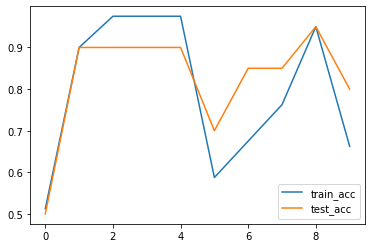

Weights: [-0.0656 -0.0426  0.0784  0.0712]    Bias: [-0.032]


In [10]:
weights, bias, train_errors, train_accs, test_accs = train_perceptron(lr=0.001)
plt.plot(train_accs, label="train_acc")
plt.plot(test_accs, label="test_acc")
plt.legend()
plt.show()

print("Weights: ", end="")
print(weights, end="    ")
print("Bias: ", end="")
print(bias)

# Unsupervised Learning

## K-Means Clustering

This algorithm clusters data by creating a "centroid" (cluster center) for each class, then moving them around to minimize the within-cluster variance. Lets try it out on the iris dataset, using all 3 classes this time.

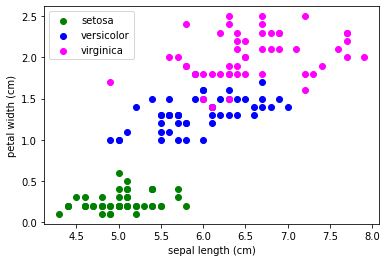

In [11]:
from sklearn.cluster import KMeans

x = data.data
y = data.target 

plt.scatter(x[:50, 0], x[:50, 3], color="green", label=data.target_names[0])
plt.scatter(x[50:100, 0], x[50:100, 3], color="blue", label=data.target_names[1])
plt.scatter(x[100:, 0], x[100:, 3], color="magenta", label=data.target_names[2])
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[3])
plt.legend()
plt.show()

Accuracy: 0.8933333333333333


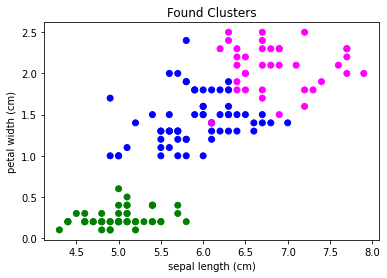

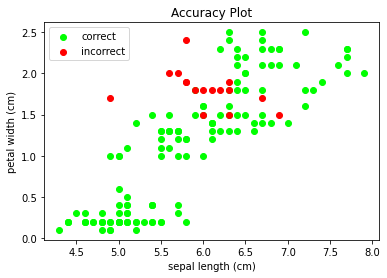

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)

y_pred = [{0:1, 1:0, 2:2}[p] for p in kmeans.predict(x)] # predict and map classes to match above

print(f"Accuracy: {(y_pred == y).sum()/y.shape[0]}")

colors_pred = [{0: "green", 1: "blue", 2: "magenta"}[yi] for yi in y_pred]
plt.scatter(x[:, 0], x[:, 3], color=colors_pred)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[3])
plt.title("Found Clusters")
plt.show()

correct = x[y_pred == y]
incorrect = x[y_pred != y]
plt.scatter(correct[:, 0], correct[:, 3], color="lime", label="correct")
plt.scatter(incorrect[:, 0], incorrect[:, 3], color="red", label="incorrect")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[3])
plt.title("Accuracy Plot")
plt.legend()
plt.show()